In [1]:
import numpy as np
import numpy.typing as npt
from typing import Any
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path

sys.path.append(str(Path("..")))

['/mnt/d/OneDrive - SNU/Research/TensorNetwork/TRG', '/home/sungbinlee/miniconda3/envs/latest/lib/python311.zip', '/home/sungbinlee/miniconda3/envs/latest/lib/python3.11', '/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/lib-dynload', '', '/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages', '..']


In [2]:
from lib.base_manage_data import load_result, delete_result, delete_all
from lib.base_function import (
    exact_free_energy, exact_order_parameter,
    exact_internal_energy, exact_heat_capacity
)

In [19]:
state = 2
if state == 0: Kc = 1.12
else: Kc = (state-1)*np.log(1+np.sqrt(state))/state

print(f"{Kc = }")

step, Dcut = 20, 40
df = load_result(state=state, step=step, Dcut=Dcut)
df.columns.values

Kc = 0.670035025828254


array(['key', 'state', 'beta', 'magnetic_field', 'step', 'Dcut',
       'initial', 'reshape', 'decompose', 'truncate', 'total', 'process',
       'free_energy', 'order_parameter', 'hamiltonian', 'heat_capacity'],
      dtype=object)

In [4]:
df.size/df.columns.values.size

500.0

In [5]:
# delete_all()

In [21]:
# # delete = df[(df["magnetic_field"] == 0.0)]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))

['1508f6', '6911cc', 'cc115e', '0260af', 'd099dd', 'ff268d', '2ccba1', '605f0d', '1cd712', '74d19d', '08c558', '2fc713', '4d05e1', '0b4c78', 'e78399', '91a307', '68f469', '10fb5c', '0bc2de', '032f69', '3d7406', '5739b0', '4e1cac', 'af45b7', '4ed8cf', 'a559ce', 'dea131', '057103', '1b2c2f', '2a7029', '3dc026', '0735cd', '567ece', '245183', 'ee3955', '194ab0', '3356cd', 'ba0291', '187d3e', '5c9800', '1d0d3e', '0f3503', '7d29a4', 'fb24b8', '3f44e5', '932fbf', '5711ca', '3ad699', 'cf56d9', '28c02e', '9cb45a', '0a1ba7', 'e95bee', '6c280b', 'c38aed', 'e6369e', 'cdb350', '052de6', 'bb33f7', '8d437a', 'e20c90', '67c361', 'b030d5', '431db8', 'f60ca6', 'e29f7c', '9c80cf', 'dfa6c3', '257383', 'cf9826', '63ca5a', '5ab860', 'a732e8', '957fb2', 'fba2fb', '1a3cc1', '59bf0d', '189413', '74b180', '7a39c4', '98183a', '1c0a56', '069a0e', '93a49e', 'e83b5d', 'cf09c7', '3d989b', '7a0d44', 'bb9719', 'f0db63', 'ab4da4', '36bda2', '59520a', '710343', 'ad3ea9', '851319', 'afc227', '010d10', '5378b9', 'c45f5a',

In [6]:
# delete_result(list(delete["key"]))

In [7]:
df = df.sort_values("beta", ascending=True)

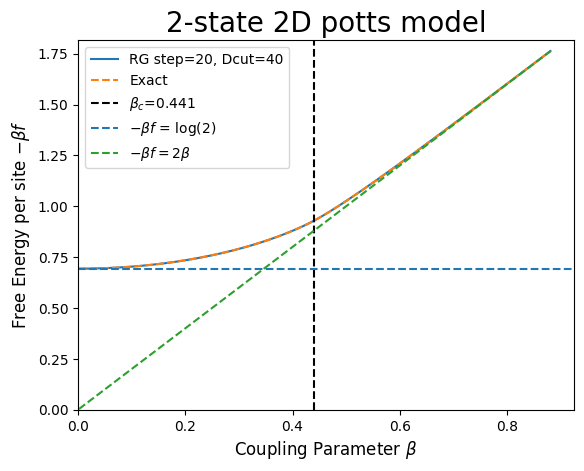

In [14]:
fig, ax = plt.subplots()

def free_energy(target_step): # * free energy = log(분배함수 Z) / N
    free_energy = []
    for free in df["free_energy"]:
        free_energy.append(free[target_step-1])
    return np.array(free_energy)

def get_beta(df):
    beta = []
    for params in df["beta"]:
        beta.append(params)
    return np.array(beta)

beta = get_beta(df)
target_step = 20

ax.plot(beta, free_energy(target_step), 
        label=f"RG step={target_step}, Dcut={Dcut}")
ax.plot(beta, exact_free_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Free Energy per site $-\beta f$", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
if state != 0: ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

plt.legend()
plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

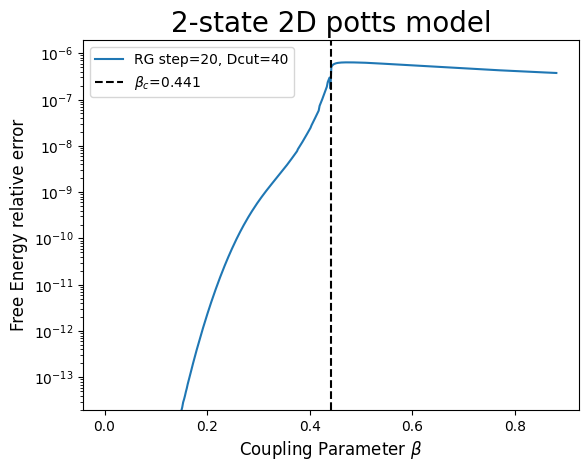

In [16]:
fig, ax = plt.subplots()

ax.plot(beta, np.abs((free_energy(
        target_step)-exact_free_energy(beta))/free_energy(target_step)),
        label=f"RG step={target_step}, Dcut={Dcut}")
ax.set_yscale("log")
# ax.set_xlim([0, coupling_max])
ax.set_ylim([2e-14, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel("Free Energy relative error", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
plt.savefig(f"./fig/{state}-state Free energy relative error.jpg")
plt.show()

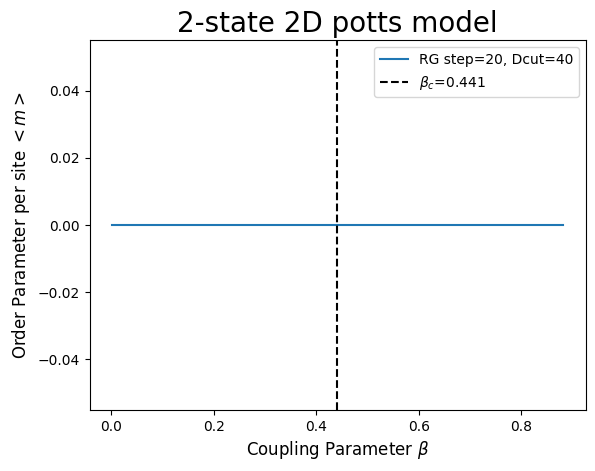

In [10]:
# fig, ax = plt.subplots()

# def order_parameter(target_step):
#     order_parameter = []
#     for value in df["order_parameter"]:
#         order_parameter.append(value[target_step-1])
    
#     return order_parameter

# target_step = 20

# ax.plot(beta, order_parameter(target_step),
#         label=f"RG step={target_step}, Dcut={Dcut}")
# # ax.plot(beta, exact_order_parameter(beta), linestyle="--", label=f"Exact")
# # ax.set_yscale("log")
# # ax.set_xlim([0, coupling_max])
# # ax.set_ylim([0,None])

# ax.set_title(rf"{state}-state 2D potts model", size=20)
# ax.set_ylabel(rf"Order Parameter per site $<m>$", size=12)
# ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
# ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")
# # ax.axhline(np.log(state), linestyle="--", label=rf"$- \beta f$ = log({state})")
# # ax.plot(beta, 2*beta, linestyle="--", label=rf"$- \beta f=2\beta$")

# plt.legend()
# # plt.savefig(f"./fig/{state}-state Order parameter.jpg")
# plt.show()

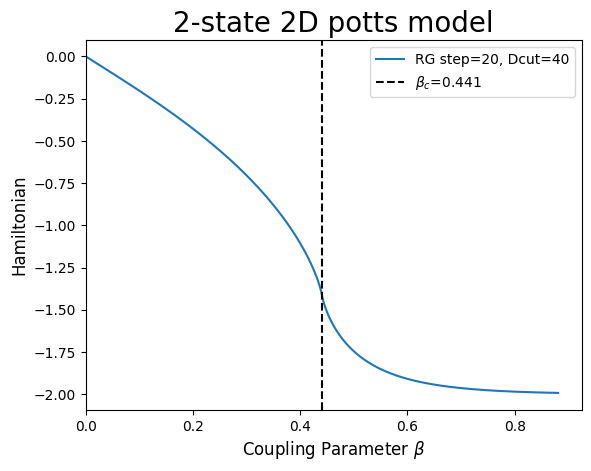

In [11]:
fig, ax = plt.subplots()

target_step = 20

hamiltonian = -np.gradient(free_energy(target_step), beta, edge_order=2)

ax.plot(beta, hamiltonian, 
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_internal_energy(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
# ax.set_ylim([-2,None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Hamiltonian", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()

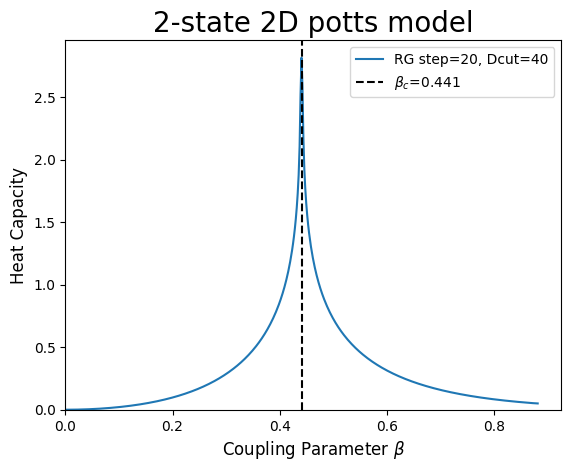

In [12]:
fig, ax = plt.subplots()

heat_capacity = -np.gradient(hamiltonian, beta, edge_order=2) * beta**2

ax.plot(beta, heat_capacity,
        label=f"RG step={target_step}, Dcut={Dcut}")
# ax.plot(beta, exact_heat_capacity(beta), linestyle="--", label=f"Exact")
# ax.set_yscale("log")
ax.set_xlim([0, None])
ax.set_ylim([0, None])

ax.set_title(rf"{state}-state 2D potts model", size=20)
ax.set_ylabel(rf"Heat Capacity", size=12)
ax.set_xlabel(rf"Coupling Parameter $\beta$", size=12)
ax.axvline(Kc, linestyle="--", color="k", label=rf"$\beta_c$={Kc:.3f}")

plt.legend()
# plt.savefig(f"./fig/{state}-state Free energy.jpg")
plt.show()